In [179]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("out/data.csv", sep='\s*,\s*', engine='python')
sns.set_style("whitegrid")
data.head()

method  cores  chunk-size  image-width  pixels      time  pixel-time  \
0    seq      1           2          512  262144  6618.780    25.24870   
1    par      1           2          512  262144  6551.230    24.99100   
2    par      4           2          512  262144  1792.170     6.83657   
3    par      8           2          512  262144   916.070     3.49453   
4    par     12           2          512  262144   627.115     2.39225   

   iter-time     iter-freq    Mflops  
0   0.003731  2.680170e+08   2144.14  
1   0.003693  2.707980e+08   2166.39  
2   0.001010  9.896590e+08   7917.27  
3   0.000517  1.935990e+09  15487.90  
4   0.000354  2.827420e+09  22619.40

In [180]:
time_serial = data[data['cores'] == 1]['time'].mean()
data['speedup'] = time_serial / data['pixel-time']
#data['eff'] = data['speedup'] / data['cores']
data.head(10)

method  cores  chunk-size  image-width   pixels       time  pixel-time  \
0    seq      1           2          512   262144   6618.780    25.24870   
1    par      1           2          512   262144   6551.230    24.99100   
2    par      4           2          512   262144   1792.170     6.83657   
3    par      8           2          512   262144    916.070     3.49453   
4    par     12           2          512   262144    627.115     2.39225   
5    par     16           2          512   262144    477.245     1.82055   
6    par     20           2          512   262144    394.542     1.50506   
7    par     24           2          512   262144    347.104     1.32410   
8    seq      1           2         1024  1048576  26389.500    25.16700   
9    par      1           2         1024  1048576  26561.200    25.33070   

   iter-time     iter-freq    Mflops       speedup  
0   0.003731  2.680170e+08   2144.14   4983.291106  
1   0.003693  2.707980e+08   2166.39   5034.677370  
2   0.001010  9.896590e+08   7917.27  18404.203006  
3   0.000517  1.935990e+09  15487.90  36005.306048  
4   0.000354  2.827420e+09  22619.40  52595.515579  
5   0.000269  3.714400e+09  29715.20  69111.873963  
6   0.000223  4.492460e+09  35939.70  83599.073886  
7   0.000196  5.107090e+09  40856.70  95024.259605  
8   0.003717  2.690180e+08   2152.14   4999.468437  
9   0.003741  2.672910e+08   2138.33   4967.159302

In [181]:
seqLinearTime = []
seqLinearSpeedup = []
for i in data['image-width'].unique():
    seqLinearTime.append(time_serial / i)
    seqLinearSpeedup.append(i)
seqLinearTime

[245.74535574776786,
 122.87267787388393,
 61.436338936941965,
 30.718169468470983]

In [182]:
import matplotlib.ticker as ticker

# Runtime

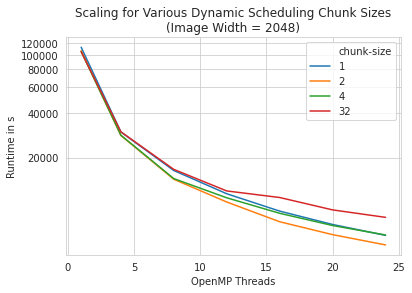

In [183]:
data2 = data[data['image-width'] == 2048]
ax1 = sns.lineplot(data=data2, x=data2['cores'], y=data2['time'], hue=data2['chunk-size'], palette="tab10")
# ax1.plot(data['image-width'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
#plt.axhline(y=time_serial, color='r', linestyle='-')
ax1.set(yscale="log", ylabel='Runtime in s', xlabel='OpenMP Threads', title='Scaling for Various Dynamic Scheduling Chunk Sizes\n(Image Width = 2048)')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.savefig("chunk-size-mandel.pdf", bbox_inches='tight')

In [151]:
plt.clf()

<Figure size 432x288 with 0 Axes>

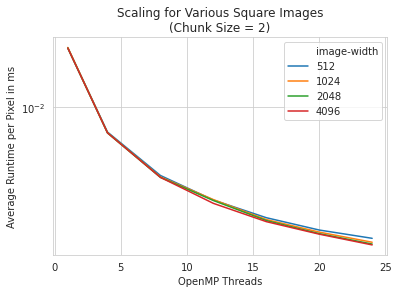

In [152]:
data3 = data[data['chunk-size'] == 2]
data3['time'] = data['time'] / data['image-width'] / data['image-width']
ax1 = sns.lineplot(data=data3, x=data3['cores'], y=data3['time'], hue=data3['image-width'], palette="tab10")
# ax1.plot(data['image-width'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
#plt.axhline(y=time_serial, color='r', linestyle='-')
ax1.set(yscale="log", ylabel='Average Runtime per Pixel in ms', xlabel='OpenMP Threads', title='Scaling for Various Square Images\n(Chunk Size = 2)')
plt.savefig("img-width-mandel.pdf", bbox_inches='tight')

In [144]:
plt.clf()

<Figure size 432x288 with 0 Axes>

# Mflop/s

In [84]:
ax1 = sns.lineplot(data=data, x=data['cores'], y=data['Mflops'], hue=data['method'], palette="tab10")
#ax1.plot(data['image-width'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
ax1.set(yscale="log", ylabel='Mflop/s', xlabel='Image Width Pixels', title='Average Mflop/s for Mandel')
plt.savefig("flops-mandel.pdf", bbox_inches='tight')

In [74]:
plt.clf()

<Figure size 432x288 with 0 Axes>